### Figure 14 of Grund & Ritter (2020) , GJI


This Jupyter Notebook is part of our [GJI paper](https://academic.oup.com/gji/article-abstract/223/3/1525/5893297?redirectedFrom=fulltext) and reproduces the upper part of **Fig. 14**.

The tectonic/geological content shown in the following was partly digitised using Didger® (Golden Software, LLC) based on the references given at the bottom of this notebook (content digitization: F. Lutz).

Feel free to modify or play around with the different parameters!

Packages required on your system:

* PyGMT, still under development (see https://www.pygmt.org/dev/overview.html)
* pandas
* numpy

author: M. Grund (2020-07-23)

**updates**: (2021-08-08) considering changes made in GMT [6.2.0](https://docs.generic-mapping-tools.org/6.2/changes.html) which is used by PyGMT >= 0.4.0

In [1]:
import pygmt
import numpy as np
import pandas as pd

# define parameters for plotting
pygmt.config(COLOR_BACKGROUND = 'white',
             COLOR_FOREGROUND = 'white',
             MAP_GRID_PEN_PRIMARY = '0.3p,dimgrey',
             MAP_ANNOT_OFFSET_PRIMARY = '5p',
             MAP_ANNOT_OFFSET_SECONDARY = '5p', 
             MAP_ANNOT_OBLIQUE = '30',
             FONT_ANNOT_PRIMARY = '8p,Helvetica', 
             FONT_LABEL = '8p',
             MAP_FRAME_TYPE = 'fancy',
             MAP_FRAME_WIDTH = '1.2p',
             MAP_FRAME_PEN = '1.1p',
             MAP_TICK_LENGTH_PRIMARY = '3p',
             MAP_LABEL_OFFSET = '0.5p',
             PS_CHAR_ENCODING = 'Standard+')

Create a new pygmt figure object.

In [2]:
fig = pygmt.Figure()

Just to see how the stack works, first we plot the contours of southern Finland. Note, this is not necessarily required.

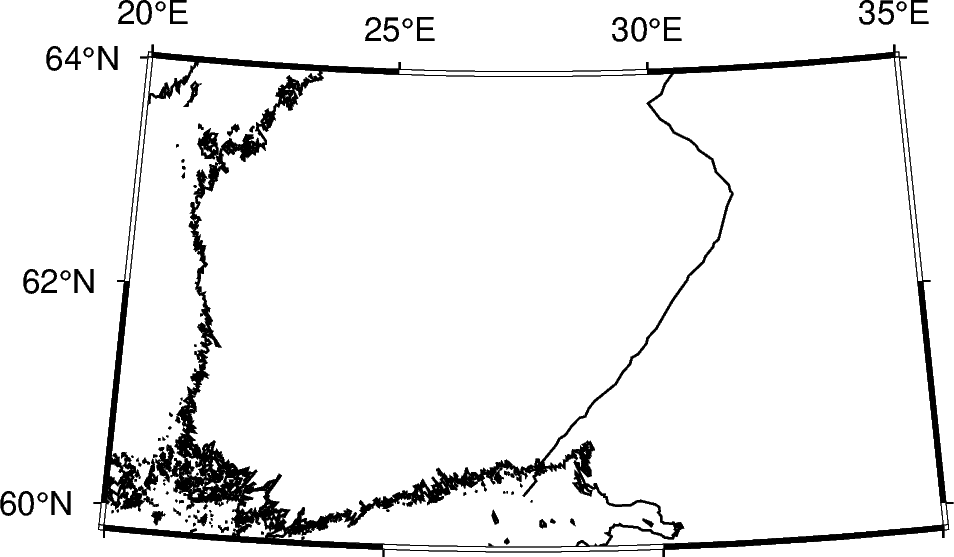

In [3]:
# define region
regvals = [20, 35, 59.8, 64]

# plot coastlines etc.
fig.coast(region = regvals, projection = 'l27.5/60/16/80/1:10000000', 
          resolution = 'i', shorelines ='1/0.5p,black', 
          frame = ['NWes','x5','y2'], borders = ['1/0.5p,black'])

fig.show()

* load the file (`filein = 'scan_tectonic.dat'`) containing the digitzed tectonic units using pandas
* define colors for the individual units
* merge content into a dictionary for easier access later

In [4]:
# read file using pandas
filein = 'scan_tectonic.dat'
namescol = ['lon', 'lat', 'name', 'num']
datatab = pd.read_table(filein, delim_whitespace = True, skiprows = 5, names = namescol)

# colors of different tectonic units
col_sveco = '248/188/203'
col_rapa = 'darkgray'
col_paleo = '107/107/148'
col_phanero = '115/195/128'
col_sveconor = '238/106/80'
col_arch = '241/99/106'
col_cale = '249/190/75'
col_TIB = '149/116/83'

# generate dict to store all data
provs = {'Phanerozoic2': col_phanero, 'Svecofennian': col_sveco, 'Rapaviki': col_rapa,
         'Paleoproterozoic': col_paleo, 'Phanerozoic': col_phanero, 'Sveconorwegian': col_sveconor,
         'Archean': col_arch, 'Caledonides': col_cale, 'TIB': col_TIB}

Plot the individual tectonic units with their corresponding colors and define labels for the legend (`label = key`) that is created later. Prior do some filtering based on the names and values given in the input file. 

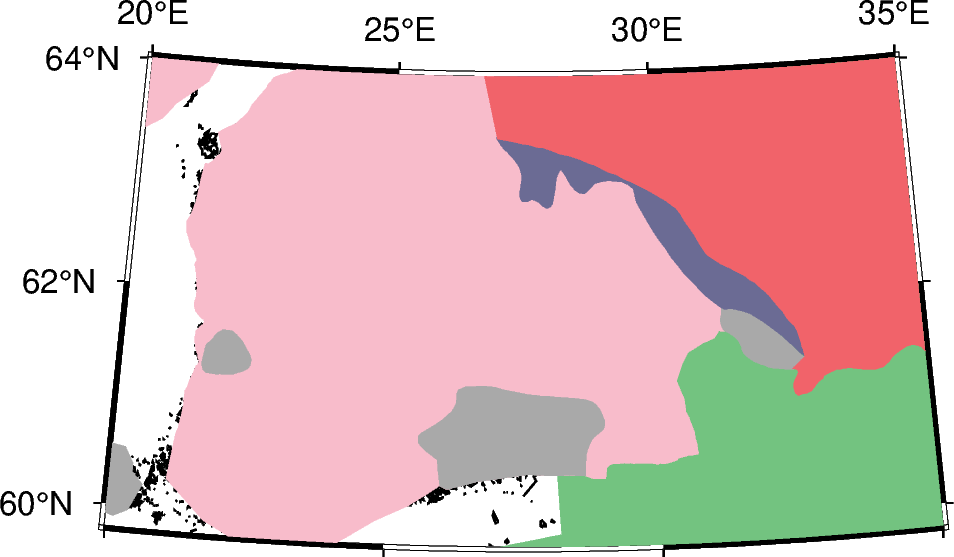

In [5]:
for key in provs:
    tabfilt11 = datatab[(datatab['name'] == key)].copy() # for each data point get name of corresponding tectonic unit
    vals = np.unique(tabfilt11['num']) # remove doublets
    
    for val in vals: # go through the different unit names and plot the areas in the defined colors
        tabfilt12 = tabfilt11[(tabfilt11['num'] == val)].copy()

        tabfilt12['lon'] = tabfilt12['lon'].astype(float) # convert to float

        lons = tabfilt12['lon']
        lats = tabfilt12['lat']
        
        # consider each area only once in the legend below (label is set or not)
        if val == 1:
            fig.plot(x = lons, y = lats, color = provs[key], label = key)
        else:
            fig.plot(x = lons, y = lats, color = provs[key])

fig.show()

Overlay whole area with white transparent rectangle to soften the bright colors. 

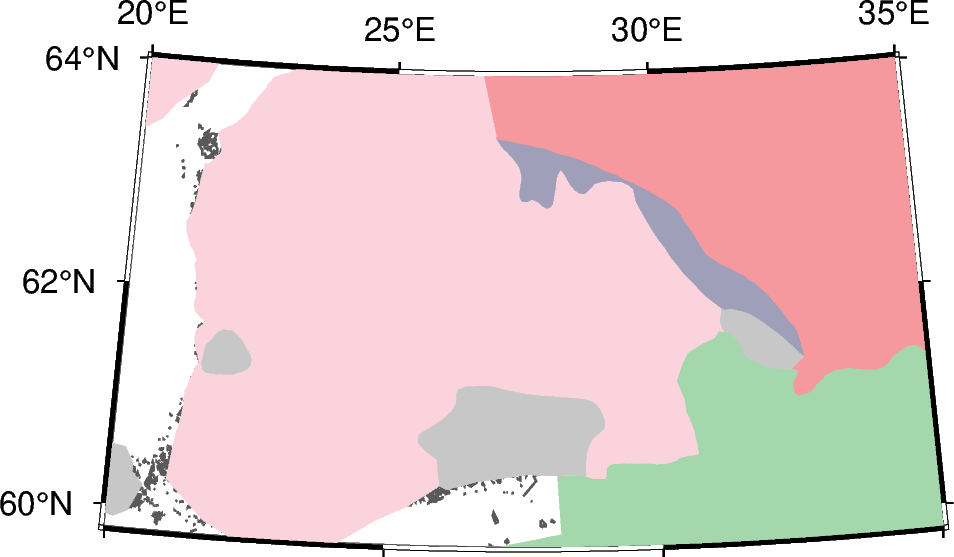

In [6]:
fig.plot(x = [-5, -5, 55, 55, -5], 
         y = [45, 80, 80, 45, 45], 
         color = 'white@65')

fig.show()

Add coastlines etc. on top to display only land masses in color of tectonic units and plot water areas in white (`water = 'white'`).

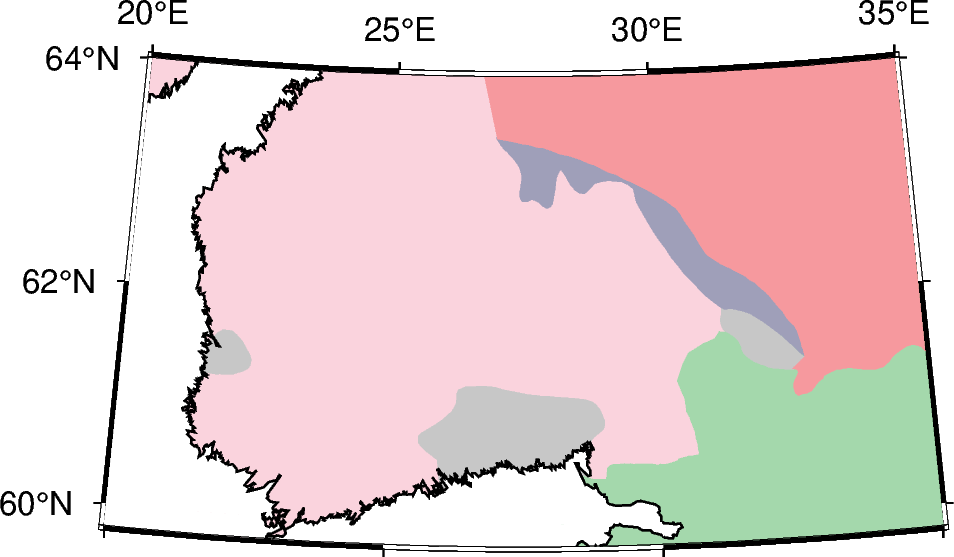

In [7]:
# add coast again on top, add national borders as dashed lines, plot lakes in steelblue color, oceans are plotted in white 
# atop which generates the masked view
fig.coast(resolution = 'i', 
          shorelines ='1/0.5p,black', 
          water = 'white', 
          area_thresh = '10000000',
          frame = 'NWEs')

fig.show()

Now we add further tectonic features like 
* shear zones
* inferred paleo-subduction zones 

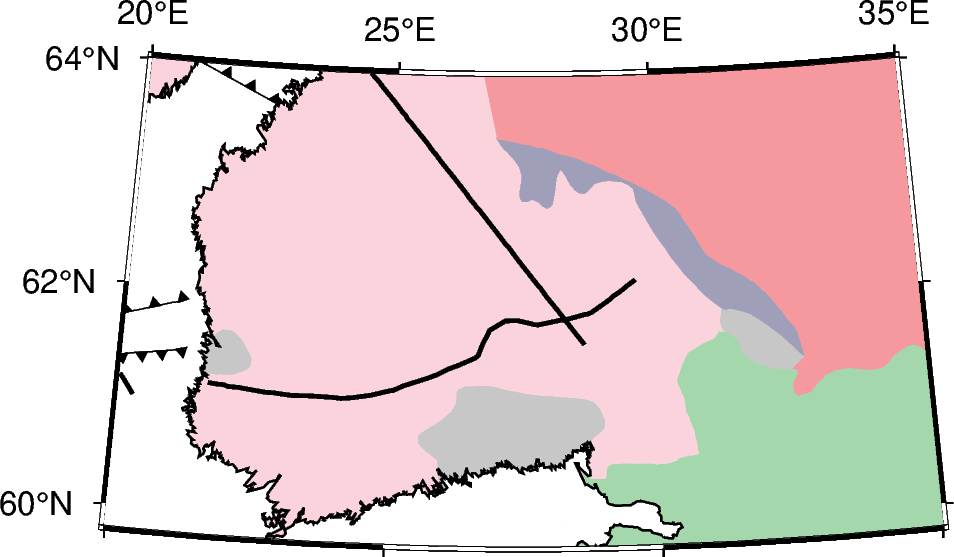

In [8]:
# read in file using pandas
filein2 = 'scan_shear_zones.dat'
namescol2 = ['lon', 'lat', 'name']
datatab2 = pd.read_table(filein2, delim_whitespace = True, skiprows = 5, names = namescol2)

# get single names of individual structures to plot
names = list(set(datatab2['name']))
namescl = [x for x in names if str(x) != 'nan']

for name in namescl: # go through the different names 
    tabfilt21 = datatab2[(datatab2['name'] == name)].copy()
    
    tabfilt21['lon'] = tabfilt21['lon'].astype(float) # convert to float
    lons = tabfilt21['lon']
    lats = tabfilt21['lat']
    
    # first distinguish between shear zones and subduction zones
    if name.startswith('Shear'):
        fig.plot(x = lons, y = lats, pen = '1p,black')
    else:
        
        # now distinguish in which direction ((l)eft or (r)ight) sawtooth pattern should be plotted
        if name.endswith('r'):    
            fig.plot(x = lons, 
                     y = lats, 
                     style = 'f0.2/0.09+t+r', 
                     pen = 'thinnest,black', 
                     color = 'black')
        else:
            fig.plot(x = lons, 
                     y = lats, 
                     style = 'f0.2/0.09+t+l', 
                     pen = 'thinnest,black', 
                     color = 'black')
            
fig.show()

Next, we plot the bars of the splitting measurements at the corresponding stations.

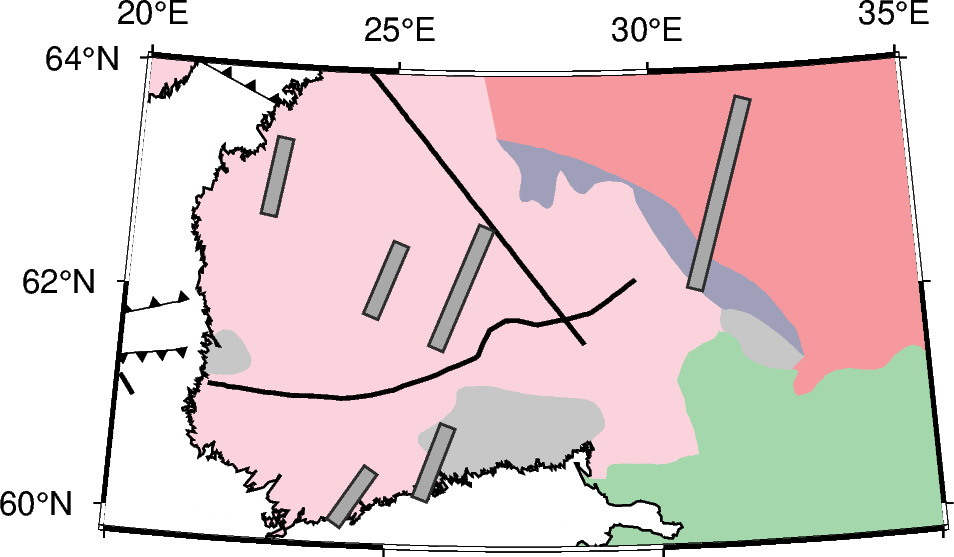

In [9]:
scale_barl=130
bar_thick=15.6
bar_fillcol='darkgray'   
bar_edgecol='44/44/44'

# using rotated rectangles based on the measured fast axis, bar lengths scale with the delay times
bar_edgecol = '44/44/44'
fig.plot(data = 'res_split_2009_297.dat', 
         style = 'J', 
         pen ='0.55p,' + bar_edgecol , 
         color = bar_fillcol)

fig.show()

Now we create a new colormap to plot circles whose color fill represent the measured delay times at the stations. Furthermore, we add a colorbar in the bottom.

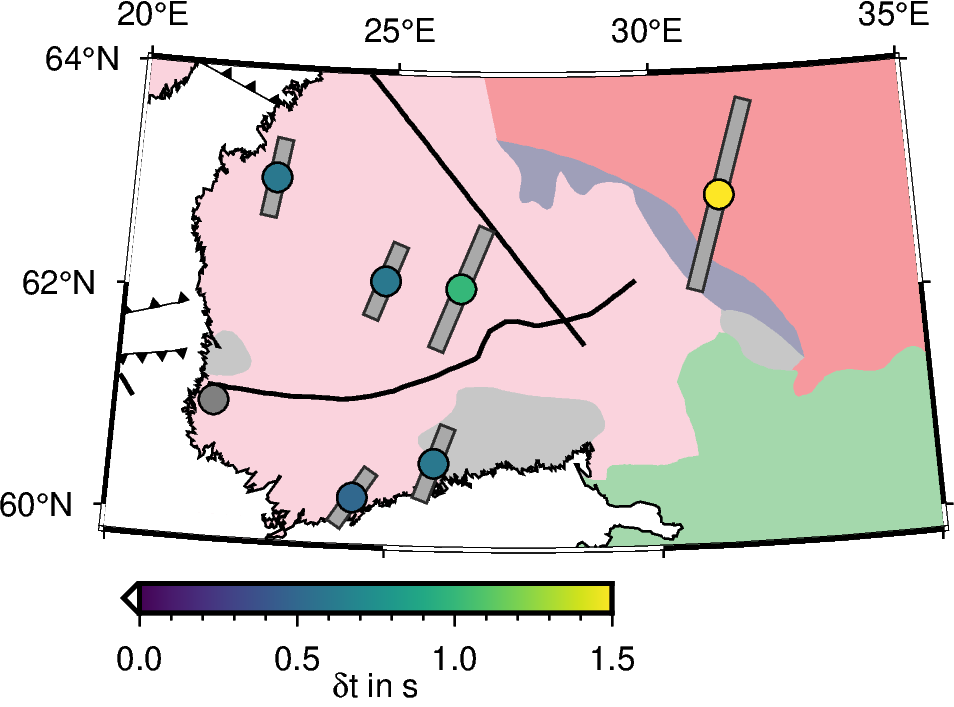

In [10]:
# create colormap
pygmt.makecpt(cmap = 'viridis', 
              reverse = False, 
              series = [0, 1.5, 0.1], 
              output = 'cmapDT.cpt', 
              continuous = True,  
              M = True)

bar_edgecol = '44/44/44'
fig.plot(data = 'res_split_2009_297_raw.dat', 
         style = 'c.25', 
         pen ='.5', 
         cmap = 'cmapDT.cpt')

# make colorbar
fig.colorbar(cmap = 'cmapDT.cpt', 
                 position = 'x0.3/-0.55+w4/0.25+eb+h', 
                 box = False, 
                 frame = ['+l"@~d@~t in s"', 'xa'])

fig.show()

Next we add several annotations.

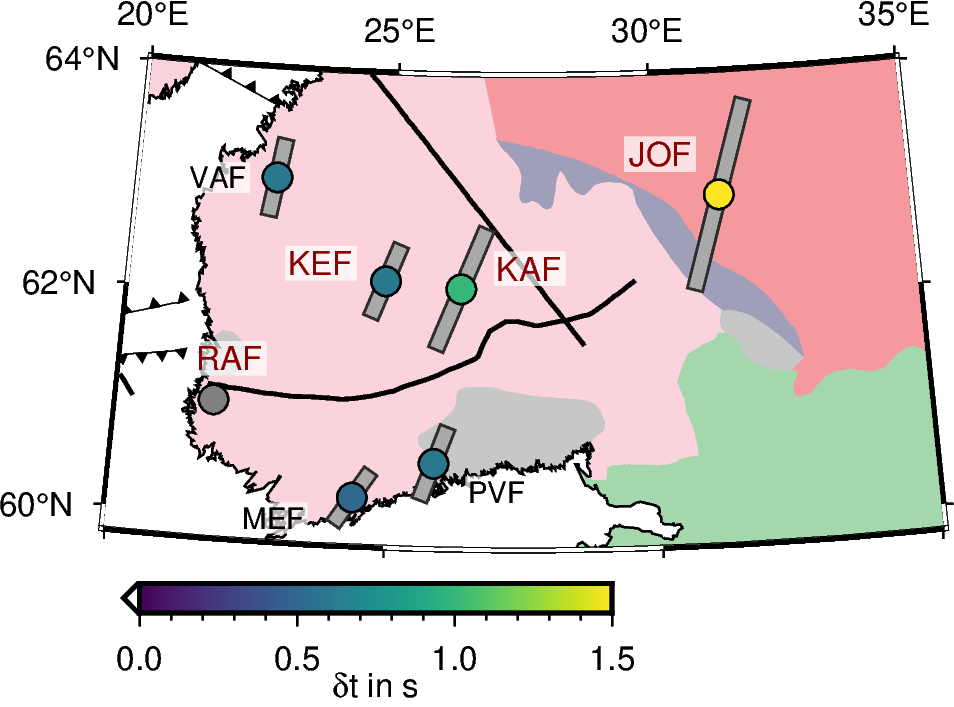

In [11]:
fig.text(x = 19.5, 
         y = 59.1, 
         text = 'Null')

fig.text(x = 30.2, 
         y = 63.3, 
         text = 'JOF',
         G = 'white@30',
         F = '+f8p,Helvetica,darkred')

fig.text(x = 27.6, 
         y = 62.3, 
         text = 'KAF',
         G = 'white@30',
         F = '+f8p,Helvetica,darkred')

fig.text(x = 23.6, 
         y = 62.3, 
         text = 'KEF',
         G = 'white@30',
         F = '+f8p,Helvetica,darkred')

fig.text(x = 22, 
         y = 61.4, 
         text = 'RAF',
         G = 'white@30',
         F = '+f8p,Helvetica,darkred')

fig.text(x = 21.5, 
         y = 63, 
         text = 'VAF',
         G = 'white@30',
         F = '+f7p,Helvetica,black')

fig.text(x = 27, 
         y = 60.3, 
         text = 'PVF',
         G = 'white@30',
         F = '+f7p,Helvetica,black')

fig.text(x = 23, 
         y = 60, 
         text = 'MEF',
         G = 'white@30',
         F = '+f7p,Helvetica,black')

fig.show()

In a next step we add a small equidistant map in the lower right corner. For this we first shift the origin.

In [12]:
# shift new map in x and y dirs
fig.shift_origin(xshift = '1.8i', 
                 yshift = '-0.42i')

coast [WARNING]: Fill/clip continent option (-G) may not work for this projection.
coast [WARNING]: If the antipode (20/90) is in the ocean then chances are good it will work.
coast [WARNING]: Otherwise, avoid projection center coordinates that are exact multiples of 200 degrees.


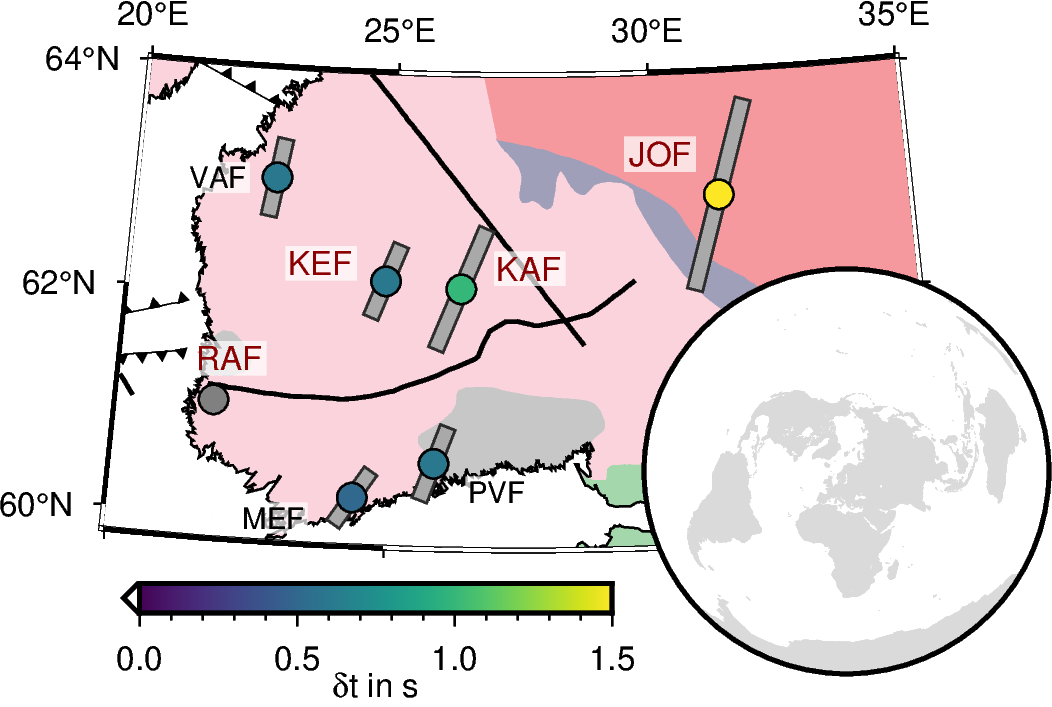

In [13]:
# center of map
centerN = 65 # latitude in degrees
centerE = 20 # longitude in degrees

colfill = '217.6/217.6/217.6'
fig.coast(region='g', 
          projection = 'E' + str(centerE) + '/'+ str(centerN) + '/160/1.35i', 
          resolution = 'c', 
          land = colfill, 
          shorelines ='1/0.1p,' + colfill, 
          C = colfill, 
          frame = True)

fig.show()

Finally, 

* we plot circles at distances of 80° and 140° from the center
* plot plate boundaries in light red color 
* add information about the earthquake for which the splitting parameters are shown

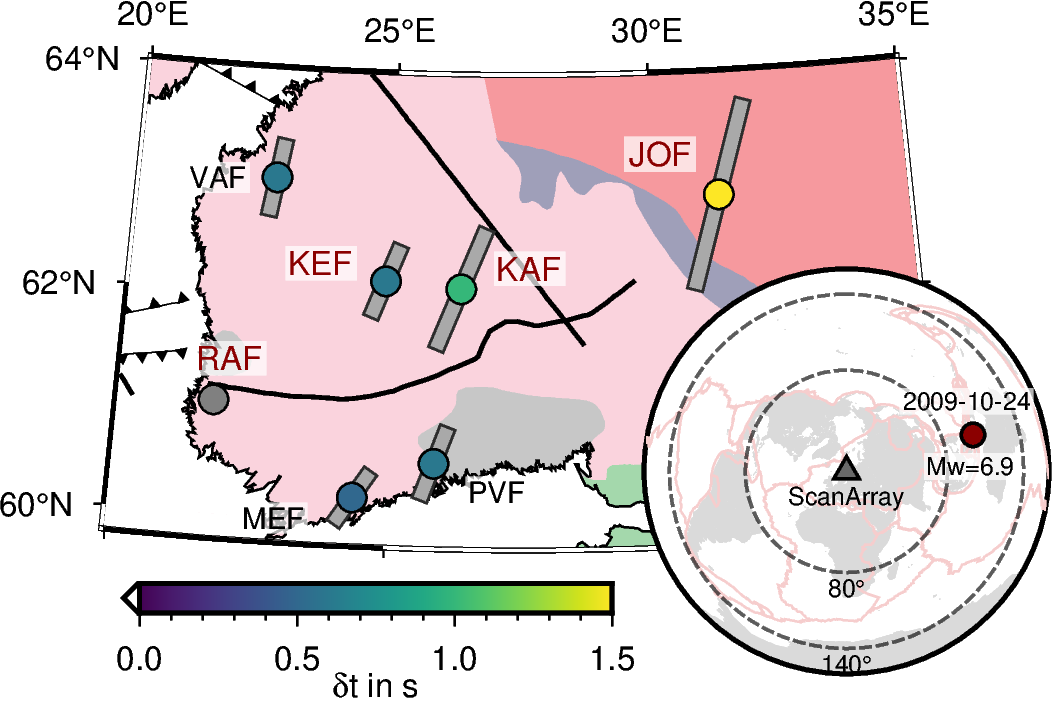

In [14]:
# plot plate boundaries
plbfile = 'pb2003_GMTready.txt'
plbcol = '245.76/204.8/204.8'
fig.plot(data = plbfile, 
         pen = '0.5p,' + plbcol)

# now plot circles at 80 and 140 degrees distance in dashed black on top, 
# use here twice the value since GMT expects the diameter
# 3_1:0p generates smaller distances between dash lines
distlims = [80,140]

for dists in distlims:
    fig.plot(x = centerE, 
             y = centerN, 
             style ='E-' + str(2 * dists) + 'd', 
             pen ='thin,black,3_1:0p',
             t = '60')

# add annotations to circles
fig.text(x = 20, 
         y = -27.5, 
         text = '80@.', 
         font='6p')

fig.text(x = 20, 
         y = -87, 
         text = '140@.', 
         font='6p')

# plot event content
fig.plot(x = 130.38, 
        y = -6.13, 
        style ='c0.2c', 
        pen ='0.7',
        color = 'darkred')

fig.text(x = 145.38, 
         y = -6.13, 
         text = '2009-10-24', 
         font='6p',
         G = 'white@30')

fig.text(x = 115.38, 
         y = -6.13, 
         text = 'Mw=6.9', 
         font='6p',
         G = 'white@30')

# plot station marker and add annotation
fig.plot(x = centerE, 
        y = centerN, 
        style ='t0.25c', 
        pen ='0.7',
        color = '105/105/105')

fig.text(x = 20, 
         y = 46, 
         text = 'ScanArray', 
         font='6p')

fig.show()

**Note**: the red box visible in the paper was added via Inkscape afterwards, together with the lower part of the figure.

Save the figure in pdf format.

In [15]:
fig.savefig('PLOT_fig14.pdf', dpi = 300)